### Introduction to Data Science
##### Instructor
Dr. Fatima Boukari

Division: PEMaCS

Final Exam: due Thursday 05/01/2025 at 11:59 pm.

Please edit this notebook and answer all the questions in this notebook and run each cell until the end of the notebook. After running each cell,

Submit your jupyter notebook as an ipynb on BB. (I need to run your code to be able to grade your exam )


In this exam, we explore data about around 275 butterflies of 2 different types (Type1, Type2). Each butterfly, have a measure of its wings_length, Body_Length and weight. The butterflies are collected from 3 different towns (A, B and C) 

In [232]:
%matplotlib inline

# read 'Butterflies_2_Types.csv'    
import pandas as pd
df = pd.read_csv('Butterflies_2_Types.csv')
df.head(10)


,Types,Town,Wings_Length,Weight,Body_Length,Gender
0,Type1,A,181,33.482143,NaN,MALE
1,Type1,A,186,33.928571,8.94956,FEMALE
2,Type1,A,195,29.017857,8.36821,FEMALE
3,Type1,A,193,30.803571,NaN,NaN
4,Type1,A,190,32.589286,8.76651,FEMALE
5,Type1,A,181,32.366071,8.66496,MALE
6,Type1,A,195,41.741071,9.18718,FEMALE
7,Type1,A,193,31.026786,9.46060,MALE
8,Type1,A,190,37.946429,NaN,NaN
9,Type1,A,186,29.464286,9.13362,NaN


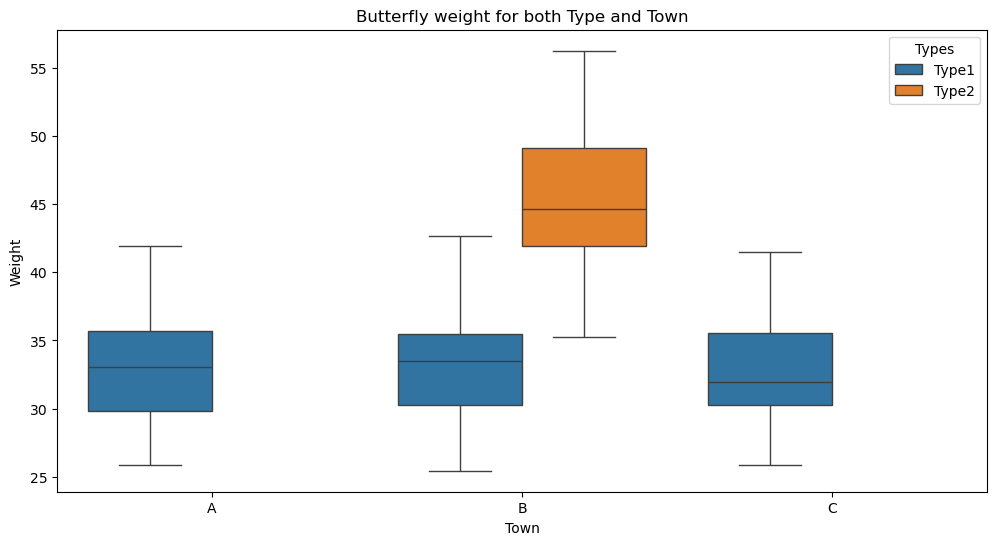

In [233]:

# Q1: Plot the Statisctics 'boxplot' using sns of the Butterfly weight (y axis) of each Type (Type1, Type2, Type3) 
# and for per each town ( x axis) X is "Town" and y is "Weight"
# Your code here

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Town', y='Weight', hue='Types')
plt.title('Butterfly weight for both Type and Town')
plt.show()


In [234]:
# Q2: What percentage (%) of the values in the dataset are missing in the columns "Body_Length" and "Gender"? 
# Then replace the Nan values in the "Body_Length" column by the average of the body length of all the butterflies
# Your code here

body_length_missing_percent = df["Body_Length"].isna().mean() * 100
gender_missing_percent = df["Gender"].isna().mean() * 100
mean_body_length = df["Body_Length"].mean()

print(f"Missing body length percentage is: {body_length_missing_percent:.2f}%")
print(f"Missing gender percentage is: {gender_missing_percent:.2f}%")

df["Body_Length"] = df["Body_Length"].fillna(mean_body_length)




Missing body length percentage is: 4.74%
Missing gender percentage is: 4.01%


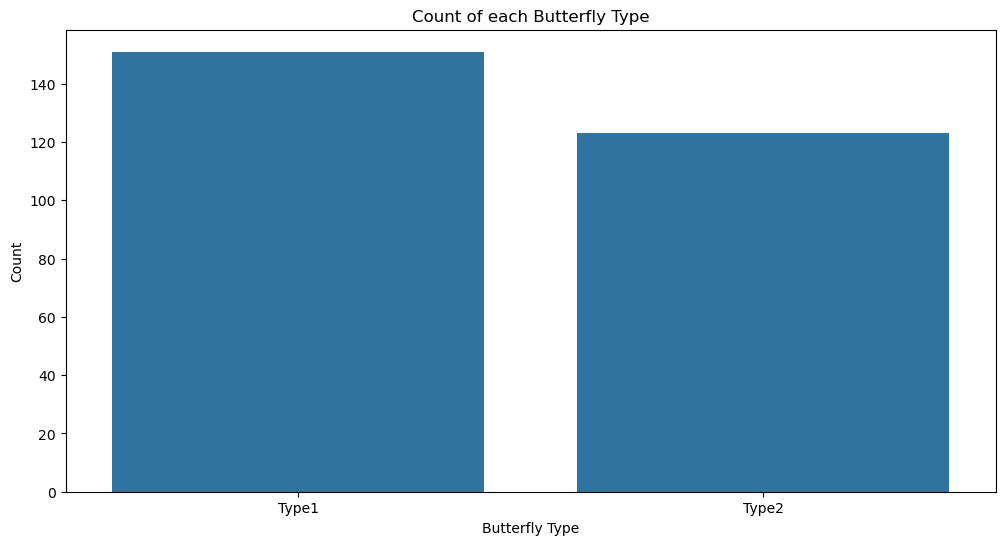

The visualization shows the count of each butterfly type. 
The count of Type one is slightly larger than the count for Type two.
This show that the dataset is not 100% balanced between the two types but the difference is not too large.


In [235]:
# Q3: Visualize to show if each butterfly type is well represented. Expalin your visualization output
# Your code here

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Types')
plt.title('Count of each Butterfly Type')
plt.xlabel('Butterfly Type')
plt.ylabel('Count')
plt.show()

print("The visualization shows the count of each butterfly type. \nThe count of Type one is slightly larger than the count for Type two.\nThis show that the dataset is not 100% balanced between the two types but the difference is not too large.")

Pearson correlation coefficient for Type1: 0.47
Pearson correlation coefficient for Type2: 0.70


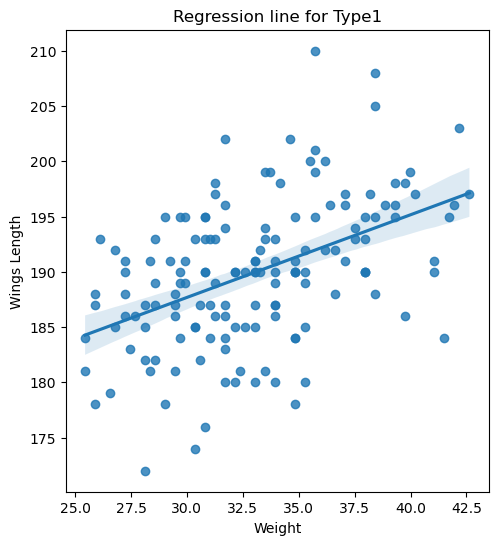

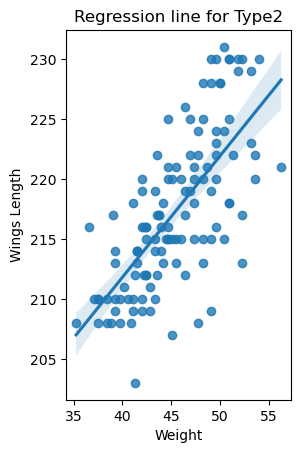

In [236]:
# Q4: Compute the Pearson Correlation Coefficient and plot the regression line of "Wings_Length" (y axis) versus "Weight" (x-axis) 
# per each Type of butterfly Type1, Type2. 

# Your code here

from scipy.stats import pearsonr
type_1 = df[df['Types'] == 'Type1']
type_2 = df[df['Types'] == 'Type2']

ct1 = pearsonr(type_1['Wings_Length'], type_1['Weight'])
ct2 = pearsonr(type_2['Wings_Length'], type_2['Weight'])
print(f"Pearson correlation coefficient for Type1: {ct1[0]:.2f}")
print(f"Pearson correlation coefficient for Type2: {ct2[0]:.2f}")

plt.figure(figsize=(12, 6))

for i, type_data in enumerate([type_1, type_2], start=1):
    plt.subplot(1, 2, i)
    sns.regplot(data=type_data, x='Weight', y='Wings_Length')
    plt.title(f'Regression line for {type_data["Types"].iloc[0]}')
    plt.xlabel('Weight')
    plt.ylabel('Wings Length')
    plt.show()


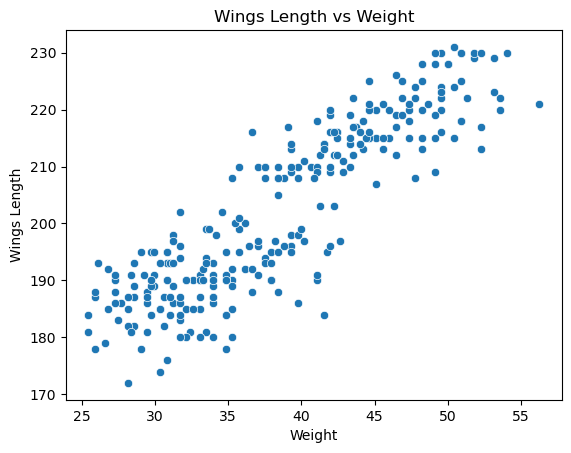

Max Weight: 56.25


In [237]:
# Q5: Scattter plot the "Wings_Length" (y axix) versus "Weight" (x axis) of all the butterflies and print the largest value of Weight in the dataset?

# Your code here

sns.scatterplot(data=df, x='Weight', y='Wings_Length')
plt.title('Wings Length vs Weight')
plt.xlabel("Weight")
plt.ylabel("Wings Length")
plt.show()

max_weight = df["Weight"].max()
print(f"Max Weight: {max_weight}")


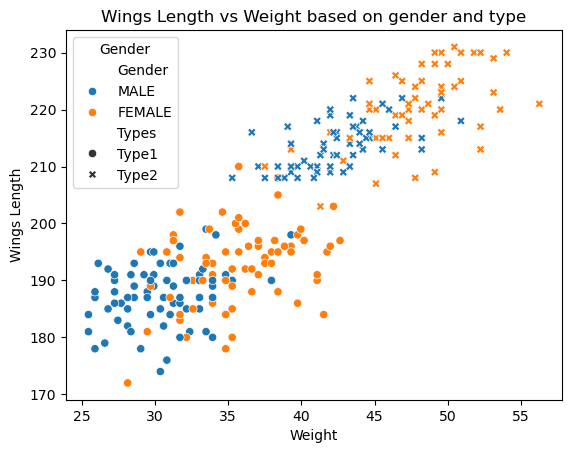

              Wings_Length     Weight  Body_Length
Types Gender                                      
Type1 FEMALE    192.616438  35.683708     8.787345
      MALE      187.513889  30.468750     8.904464
Type2 FEMALE    220.543860  47.991071     8.192544
      MALE      213.770492  42.341189     8.316640


In [238]:
# Q6: Plot the scatter plot and average Wings_Length, Weight and Body_Length per Male/Female of each butterfly type.

sns.scatterplot(data=df, x="Weight", y="Wings_Length", hue="Gender", style="Types")
plt.title("Wings Length vs Weight based on gender and type")
plt.xlabel("Weight")
plt.ylabel("Wings Length")
plt.legend(title="Gender", loc="best")
plt.show()

average_values = df.groupby(["Types", "Gender"])[["Wings_Length", "Weight", "Body_Length"]].mean()
print(average_values)

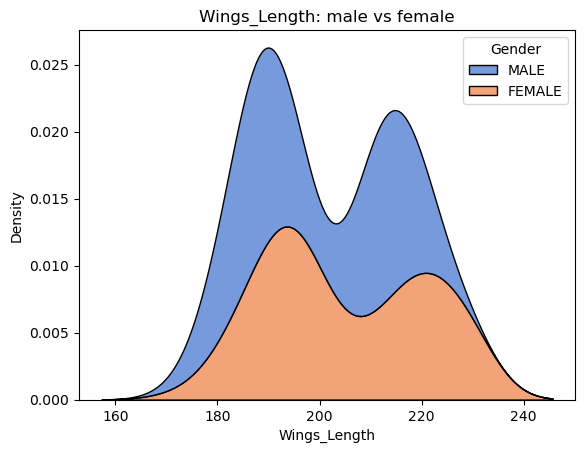

In [239]:
# Q7: Plot two distributions of the Wings_Length per each type and per Male and Female on the same axes to visualize how the wings length differ over each type and per male and female.
sns.kdeplot(data=df, x="Wings_Length", hue="Gender", multiple="stack", palette="muted", fill=True)
plt.title("Wings_Length: male vs female")
plt.show()


In [240]:
# Q8: Apply One_hot Encoding on the town feature and add it to the dataset.

town_encoded = pd.get_dummies(df["Town"], prefix="Town")
df = pd.concat([df, town_encoded], axis=1)
df.drop(columns=["Town"], inplace=True)
df.head()



,Types,Wings_Length,Weight,Body_Length,Gender,Town_A,Town_B,Town_C
0,Type1,181,33.482143,8.576809,MALE,True,False,False
1,Type1,186,33.928571,8.949560,FEMALE,True,False,False
2,Type1,195,29.017857,8.368210,FEMALE,True,False,False
3,Type1,193,30.803571,8.576809,NaN,True,False,False
4,Type1,190,32.589286,8.766510,FEMALE,True,False,False


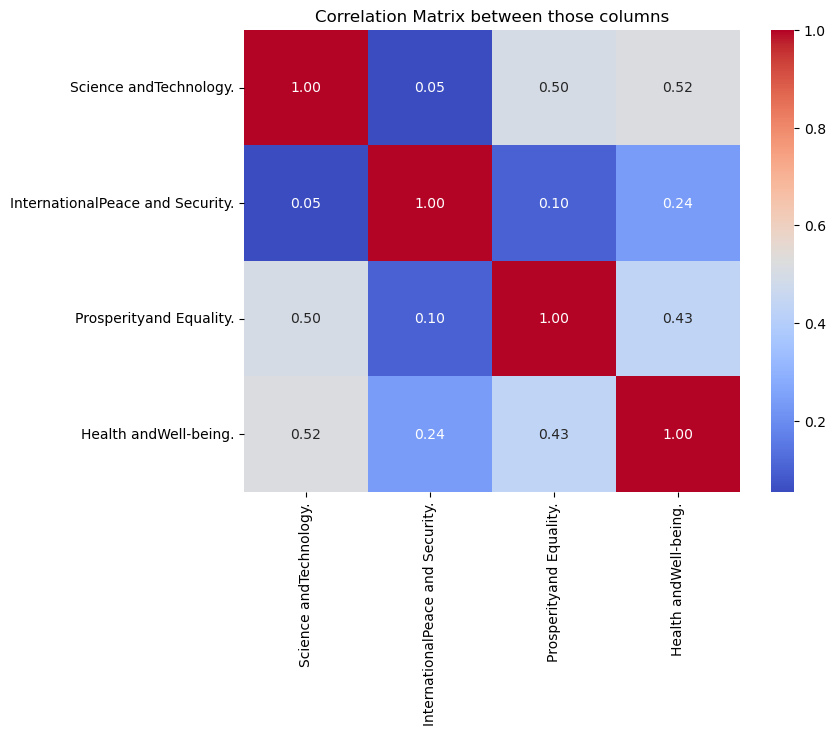

In [241]:
# Q9 : Choose any web page url from internet that contain some data, choose up to four num columns then plot the correlation matrix between those columns. 
# Remember to be cautious and respectful in what you scrape. Always check the legality of a web scraping job

import requests
from bs4 import BeautifulSoup


def extract_data(url):

    result = []
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Failed to load page: {response.status_code}")

    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find_all('table')[3]
    rows = table.find_all('tr')

    for row in rows:
        cells = row.find_all(['th', 'td'])
        clean_cells = [cell.text.strip() for cell in cells]
        if clean_cells: 
            result.append(clean_cells)
    return result
    

def save_to_csv(data, name):
    df = pd.DataFrame(data[1:], columns=data[0])
    df.to_csv(name, index=False)

NAME = "good_country_index.csv"
data = extract_data("https://en.wikipedia.org/wiki/Good_Country_Index")
save_to_csv(data, NAME)

web_df = pd.read_csv(NAME)
#df.head(10)

columns = ["Science andTechnology.", "InternationalPeace and Security.", "Prosperityand Equality.", "Health andWell-being."]
df_selected = web_df[columns].apply(pd.to_numeric, errors='coerce')
#df_selected.isna().sum() -> outputs: 0

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix between those columns")
plt.show()




In [242]:
# Q10: Exaplain the k-means algorithm and cite the main drawbacks of k-means and how we can solve it.
#

print("""
    K-means is an unsupervised machine learning algorithm used for clustering. 
    This algorithm works bt partitioning the data into K distinct clusters based on similarity.
    the algorith usually follow this pattern:
        1. choose the number of clusters K
        2. randomly initialize K centroids
        3. assign each data point to the nearest centroid
        4. recalculate the centroids based on the assigned data points
        5. repeat steps 3 and 4 until there is no change in the centroids.
      """)


    K-means is an unsupervised machine learning algorithm used for clustering. 
    This algorithm works bt partitioning the data into K distinct clusters based on similarity.
    the algorith usually follow this pattern:
        1. choose the number of clusters K
        2. randomly initialize K centroids
        3. assign each data point to the nearest centroid
        4. recalculate the centroids based on the assigned data points
        5. repeat steps 3 and 4 until there is no change in the centroids.
      


In [243]:
# We would like to analyze changes in the daily closing prices of various stocks. The data set provided contains the historical closing prices of stocks for 3 large companies (Microsoft (MSFT), Ford Motor Company (F), and Bank of America (BAC)).  
# The data provided consists of a csv and an excel data file under the name  “Stock_Market_with_missing_values.csv"
# read 'Stock_Market_with_missing_values.csv'

import pandas as pd
df = pd.read_csv('Stock_Market_with_missing_values.csv')
df.head()

,Date,MSFT,F,BAC
0,1/3/2007,29.860001,7.51,53.330002
1,1/4/2007,29.809999,7.70,53.669998
2,1/5/2007,29.639999,7.62,53.240002
3,1/8/2007,29.930000,7.73,53.450001
4,1/9/2007,29.959999,7.79,53.500000


In [244]:
# The data contains some missing values. Fill the missing values of each stock based on the following procedures. 
# Q11_a: For the stock MSFT: Every zero will be replaced by the most frequent value of the stock.
maximum_value = df['MSFT'].mode()[0]
df['MSFT'] = df['MSFT'].replace(0, maximum_value)
df.head(10)



,Date,MSFT,F,BAC
0,1/3/2007,29.860001,7.51,53.330002
1,1/4/2007,29.809999,7.70,53.669998
2,1/5/2007,29.639999,7.62,53.240002
3,1/8/2007,29.930000,7.73,53.450001
4,1/9/2007,29.959999,7.79,53.500000
5,1/10/2007,29.660000,7.73,53.580002
6,1/11/2007,30.700001,7.77,53.259998
7,1/12/2007,31.209999,7.89,53.380001
8,1/16/2007,31.160000,7.94,53.439999
9,1/17/2007,31.100000,8.04,53.320000


In [245]:

# Q11_b: For the stock Bank of America (BAC): Every zero will be replaced by the average value of the 5 rows before and the 5 rows after the date of the stock.

import numpy as np

# checks how many values are missing
print(f"Number of missing values: {(df["BAC"] == 0).sum()}") # output: 9

def replace_zeros_with_neighbor_average(df, column):
    values = df[column].copy()

    for i in range(len(values)):
        if values[i] == 0:
            start = max(i - 5, 0)
            end = min(i + 6, len(values))
            ten_rows = list(values[start:i]) + list(values[i+1:end])
            ten_rows = [x for x in ten_rows if x != 0]
            if ten_rows:
                values[i] = sum(ten_rows) / len(ten_rows)
    df[column] = values
    return df

df = replace_zeros_with_neighbor_average(df, "BAC")

# checks to see if any values are still missing
print(f"Number of missing values now: {(df["BAC"] == 0).sum()}") # output: 0

Number of missing values: 9
Number of missing values now: 0


/var/folders/jy/pwjg65bx6l36whwq5z7g5mgc0000gn/T/ipykernel_73165/3016865529.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_changes = df[columns].pct_change() * 100


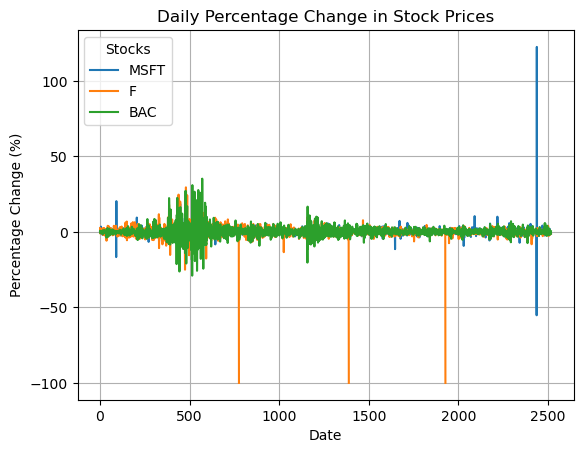

In [246]:

# Q 12: Compute and plot the percentage (%) daily changes in the daily closing price of each stock Δ(t) the price of a stock on day t 
# and the price on its previous day, t−1. For simplicity, the previous day’s stock value is the considered as the value in the previous row. 
import pandas as pd
import matplotlib.pyplot as plt


columns = ["MSFT", "F", "BAC"]
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')

daily_changes = df[columns].pct_change() * 100
daily_changes = daily_changes.dropna()
daily_changes.plot()

plt.title("Daily Percentage Change in Stock Prices")
plt.ylabel("Percentage Change (%)")
plt.xlabel("Date")
plt.legend(title="Stocks")
plt.grid(True)
plt.show()

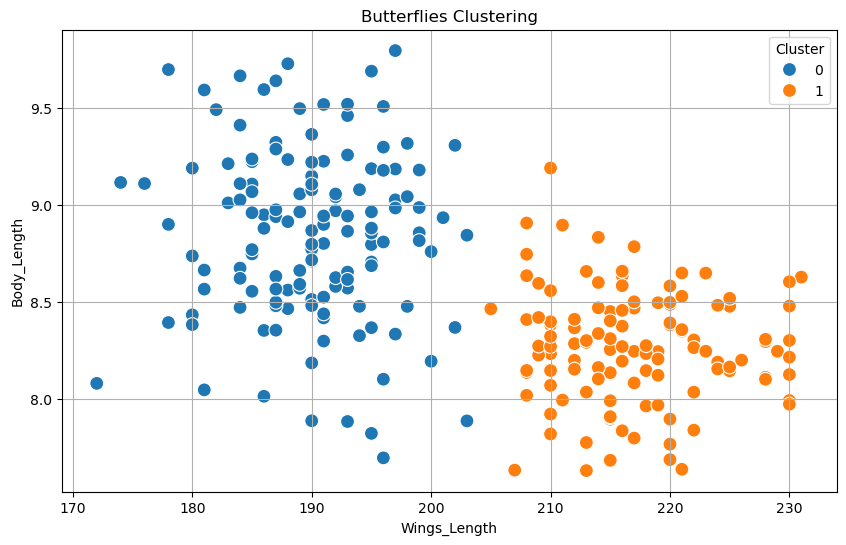

In [247]:
# Q 13: Apply clustering and visualize your clusters on Butterflies_2_Types.csv. 
# We will leave your decision on choosing which features you will be using for this question.

from sklearn.cluster import KMeans

butterflies = pd.read_csv('Butterflies_2_Types.csv')
butterflies.dropna(inplace=True)
features = ['Wings_Length', 'Body_Length']
X = butterflies[features]

kmeans = KMeans(n_clusters=2, random_state=42)
butterflies['Cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=butterflies, x=features[0], y=features[1], hue='Cluster', s=100)
plt.grid(True)
plt.title("Butterflies Clustering")
plt.show()




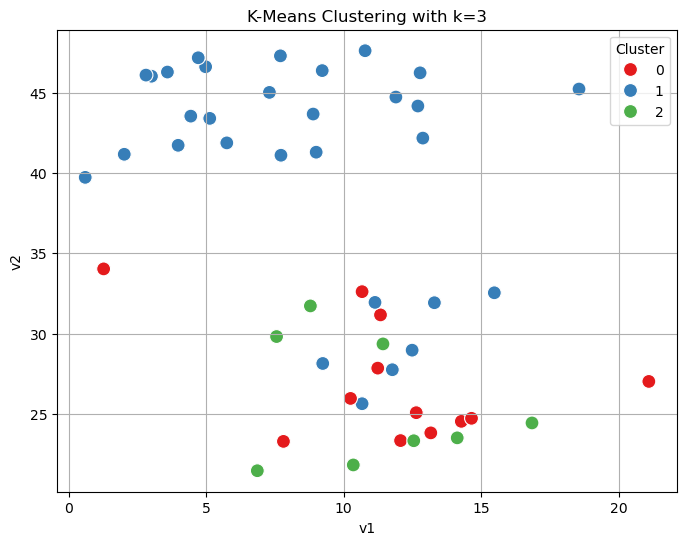

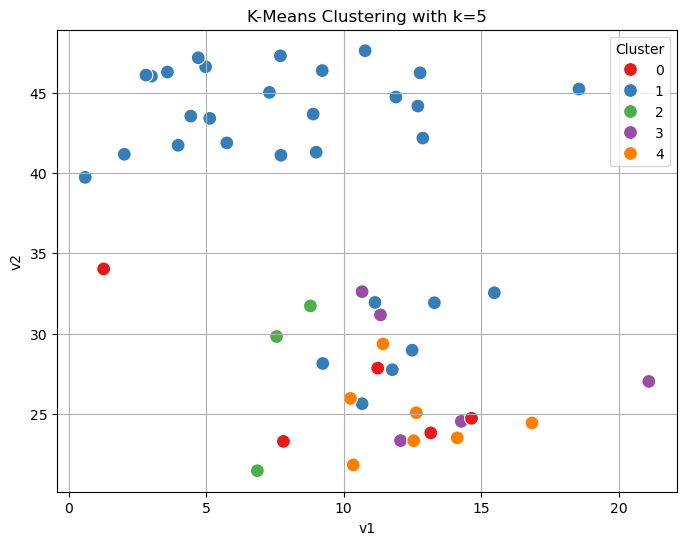

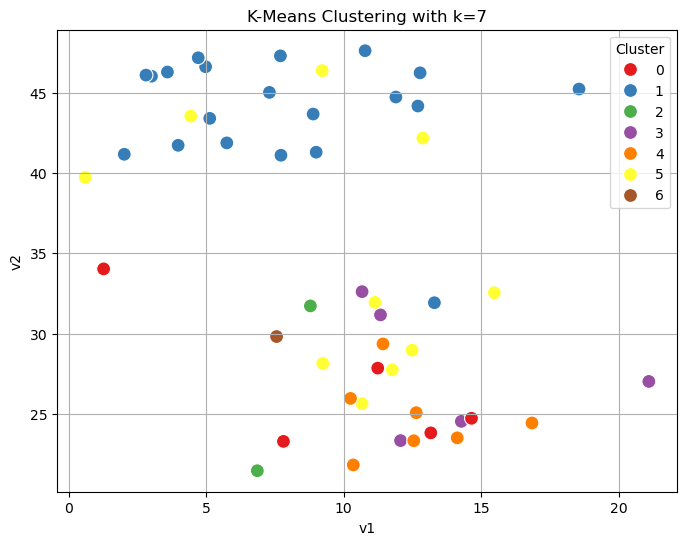

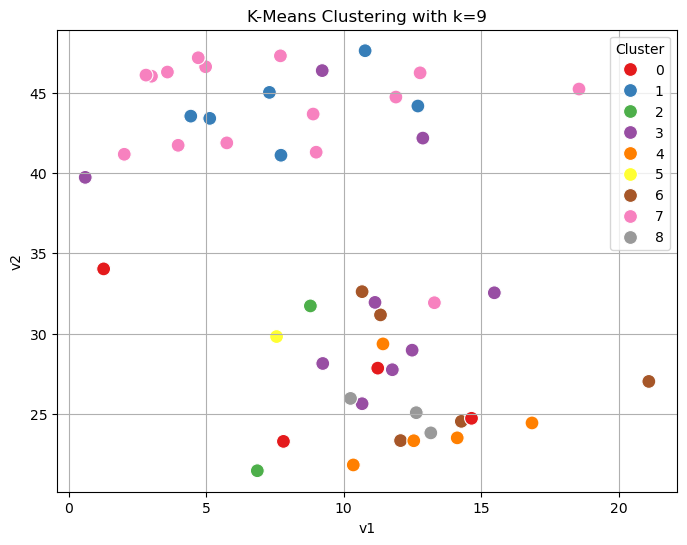

In [248]:
# To determine the different efforts of countries on the environmental issues. We would like to apply clustering using a dataset 
# of 51 different countries. 
# read "data_Clustering.csv".
# Q14: Perform clustering using k-means (choose k=3, 5 , 7 and 9 )  

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from IPython.display import clear_output

df = pd.read_csv("data_Clustering.csv")
X = df.select_dtypes(include=['float64', 'int64'])
k_values = [3, 5, 7, 9]
cluster_results = {}
errors = {}

for k in k_values:
    # using KMeans from sklearn instead of starting from scratch
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    cluster_results[k] = cluster_labels
    df[f'Cluster_k{k}'] = cluster_labels
    # this is for the next question
    errors[k] = kmeans.inertia_


for i in range(len(k_values)):
    k = k_values[i]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=df[f'Cluster_k{k}'], palette='Set1', s=100)
    plt.title(f"K-Means Clustering with k={k}")
    plt.legend(title="Cluster")
    plt.grid(True)
    plt.show()

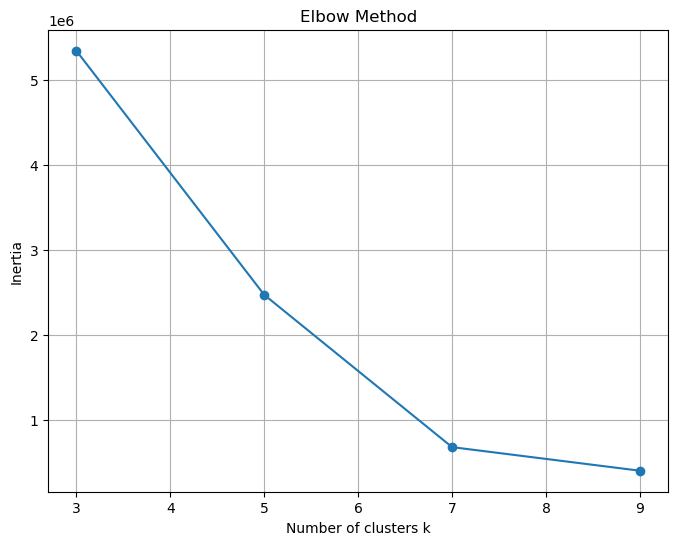

The elbow method shows that the best number of clusters is around k=7 because after k=7, the change is not significant.


In [249]:
# Q15: Calculate error values for all k values we're interested in then 
# Give the the best number of clusters based on different experiments.


plt.figure(figsize=(8, 6))
plt.plot(list(errors.keys()), list(errors.values()), marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

print("The elbow method shows that the best number of clusters is around k=7 because after k=7, the change is not significant.")

Size of original image: 549x976
Size of resized image: 274x488


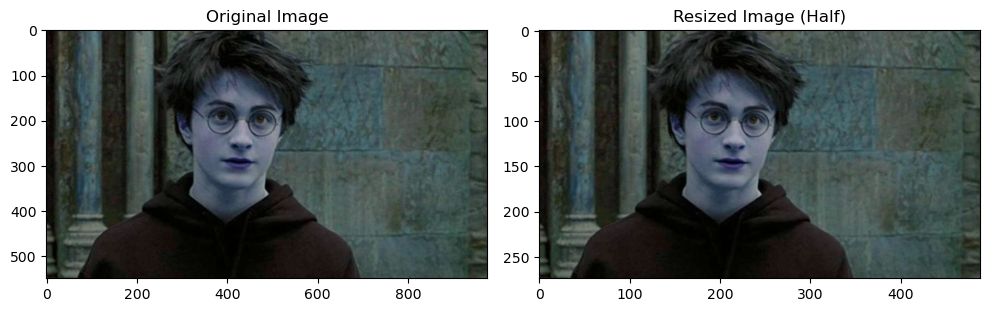

In [250]:
# read and show Harry1 image
# Q16: Apply resizing the image by reducing the size by half. ( new image is half the size of the original image)

from skimage import io
import cv2

img_url = "Harry1.jpg"

img = io.imread(img_url)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width = img.shape[:2]

resized_img = cv2.resize(img_rgb, (width // 2, height // 2))

print(f"Size of original image: {height}x{width}")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis('on')

resized_img_height, resized_img_width = resized_img.shape[:2]
print(f"Size of resized image: {resized_img_height}x{resized_img_width}")

plt.subplot(1, 2, 2)
plt.title("Resized Image (Half)")
plt.imshow(resized_img)
plt.axis('on')

plt.tight_layout()
plt.show()


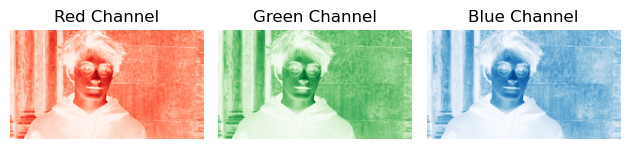

In [251]:
# Q 17: Show each of the RGB channels of the image 
import matplotlib.pyplot as plt
import cv2


R, G, B = cv2.split(img_rgb)

plt.subplot(1, 3, 1)
plt.imshow(R, cmap='Reds')
plt.title("Red Channel")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(G, cmap='Greens')
plt.title("Green Channel")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(B, cmap='Blues')
plt.title("Blue Channel")
plt.axis('off')

plt.tight_layout()
plt.show()

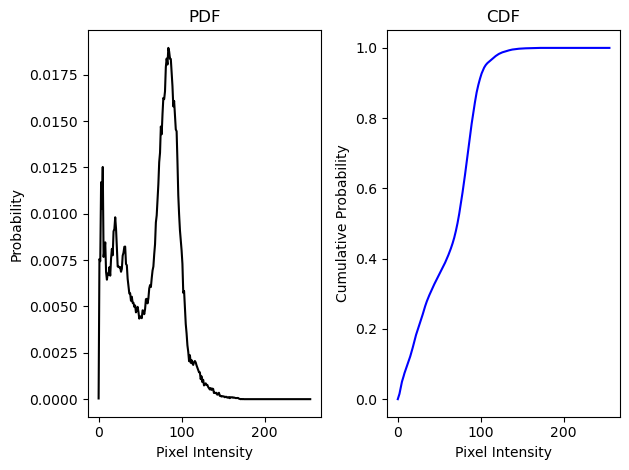

In [252]:
# Q 18: Plot the histogram PDF and the CDF of the new image

grey_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

histogram = cv2.calcHist([grey_img], [0], None, [256], [0, 256])
pdf = histogram / histogram.sum()
cdf = pdf.cumsum()

plt.subplot(1, 2, 1)
plt.plot(pdf, color='black')
plt.title('PDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
plt.plot(cdf, color='blue')
plt.title('CDF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

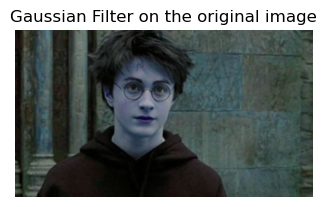

In [253]:
# Q19: Apply Gaussian Filter on the original image

import cv2

gaussian_filtered_img = cv2.GaussianBlur(img_rgb, (5, 5), 0)

plt.subplot(1, 2, 2)
plt.title("Gaussian Filter on the original image")
plt.imshow(gaussian_filtered_img)
plt.axis('off')

plt.tight_layout()
plt.show()

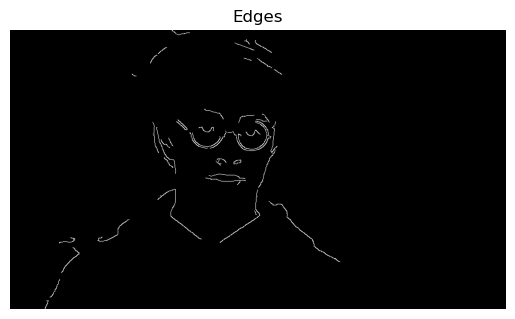

In [254]:
# Q20: Show the edges of the image 
image = cv2.imread("Harry1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, threshold1=100, threshold2=200)
plt.title("Edges")
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

